In [9]:
# if (!requireNamespace('BiocManager', quietly = TRUE))
# install.packages('BiocManager') BiocManager::install('ComplexHeatmap')
# install.packages(c('ClusterR','tidyverse'))
suppressMessages(require(pheatmap))
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))
require(RColorBrewer)
# require(ClusterR) require(pracma)

In [2]:
(meta.dat <- fread("../data_processed/meta_data.csv") %>% mutate(dpi = as.factor(`Day Post-Infection`), 
    Age = factor(`Host Age Category`, levels = c("young", "adult", "aged")), Strain = as.factor(`Viral Strain`)) %>% 
    select("Time_BiosetID", Age, Strain, dpi) ) %>% 
    summary

 Time_BiosetID         Age                Strain    dpi    
 Length:74          young:28   SARS-CoV-ic   : 4   0.5: 6  
 Class :character   adult:37   SARS-CoV-MA15 :54   1  :15  
 Mode  :character   aged : 9   SARS-CoV-MA15e: 7   2  :19  
                               SARS-CoV-MA15g: 7   4  :19  
                               SARS-CoV-TOR-2: 2   7  :15  

In [4]:
(dat <- fread("../data_processed/plot_dat.csv") %>%
    column_to_rownames("V1")) %>%
    head(1)
dat %>%
    dim

(glist <- fread("../data_processed/bootstrap/bootstrap_features_selected.csv", header = T) %>%
    column_to_rownames("gene")) %>%
    head(1)

,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
March1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 10564    74

,counts,avg_weight,std_weight
,<int>,<dbl>,<dbl>
Adm,100,-0.1208498,0.08808907


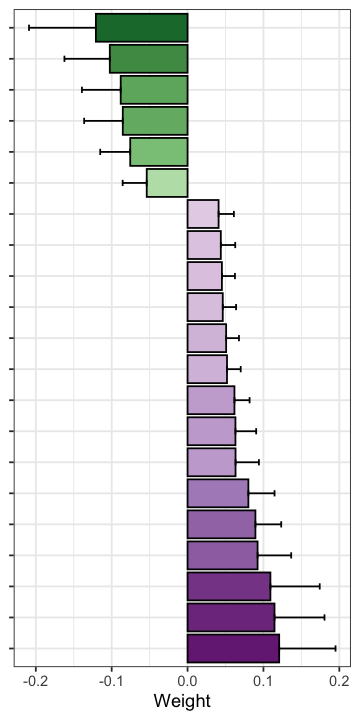

In [6]:
options(repr.plot.width = 3, repr.plot.height = 6)

p.weight_bar = ggplot(glist %>%
    rownames_to_column("gene") %>%
    mutate(gene = factor(gene, levels = glist %>%
        rownames %>%
        rev)), aes(gene, avg_weight, fill = avg_weight)) + geom_bar(stat = "identity",
    color = "black") + scale_fill_distiller(palette = "PRGn") + geom_errorbar(aes(ymin = avg_weight,
    ymax = ifelse(avg_weight > 0, avg_weight + std_weight, avg_weight - std_weight)),
    width = 0.2, position = position_dodge(0.9)) + coord_flip() + theme_bw() + theme(legend.position = "none",
    axis.text.y = element_blank(), axis.title.y = element_blank()) + ylab(label = "Weight")
p.weight_bar

In [16]:
df_col_anno %>% head()

,time,stage
,<chr>,<chr>
0.5_867451,0.5,early
0.5_867454,0.5,early
0.5_867457,0.5,early
0.5_867478,0.5,early
0.5_867481,0.5,early
0.5_867484,0.5,early


In [40]:
meta.dat  %>% head

,Age,Strain,dpi
,<fct>,<fct>,<fct>
0.5_867451,aged,SARS-CoV-MA15,0.5
0.5_867454,aged,SARS-CoV-MA15e,0.5
0.5_867457,aged,SARS-CoV-MA15g,0.5
0.5_867478,young,SARS-CoV-MA15,0.5
0.5_867481,young,SARS-CoV-MA15e,0.5
0.5_867484,young,SARS-CoV-MA15g,0.5


In [85]:
table(df_col_anno$Strain)


   SARS-CoV-ic  SARS-CoV-MA15 SARS-CoV-MA15e SARS-CoV-MA15g SARS-CoV-TOR-2 
             4             54              7              7              2 

[1] 6

In [20]:
which((glist$avg_weight %>%
        rev) <0)[1] - 1

[1] 15

In [24]:
df_col_anno 

,stage,dpi,variant,age
,<chr>,<fct>,<fct>,<fct>
0.5_867451,early,0.5,SARS-CoV-MA15,aged


Joining, by = "Time_BiosetID"



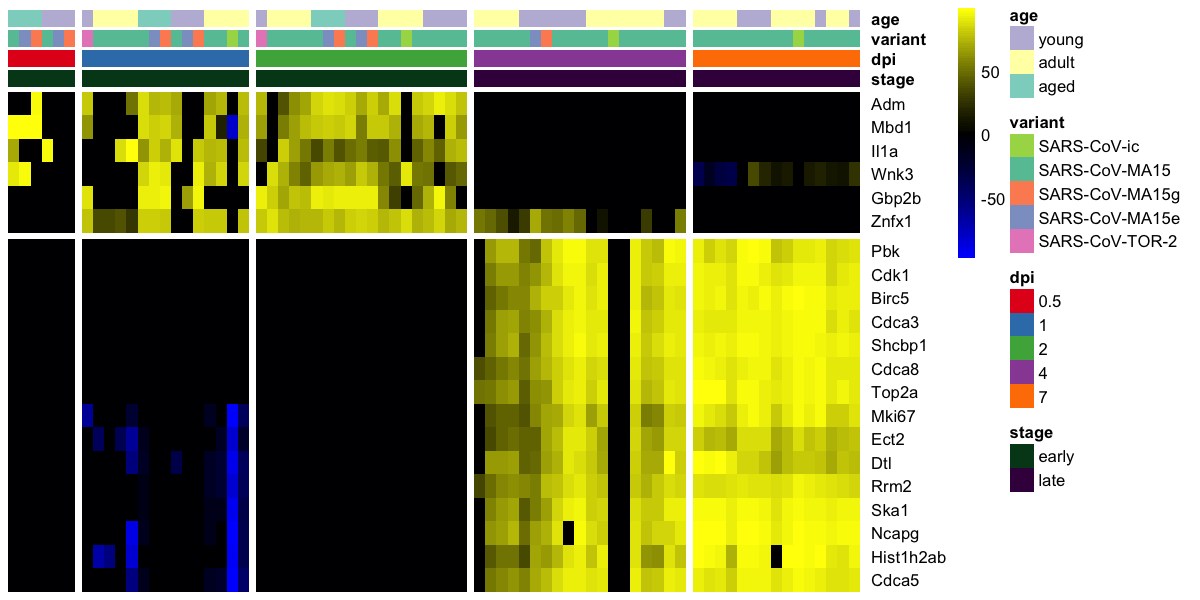

In [30]:
options(repr.plot.width = 10, repr.plot.height = 5)
n = 0
anno_colors <- list(stage = c(early = brewer.pal(n = 11, "PRGn")[11 - n], late = brewer.pal(n = 11,
    "PRGn")[1 + n]), dpi = c(`0.5` = brewer.pal(n = 9, "Set1")[1], `1` = brewer.pal(n = 9,
    "Set1")[2], `2` = brewer.pal(n = 9, "Set1")[3], `4` = brewer.pal(n = 9, "Set1")[4],
    `7` = brewer.pal(n = 9, "Set1")[5]), variant = c(`SARS-CoV-ic` = brewer.pal(n = 8,
    "Set2")[5], `SARS-CoV-MA15` = brewer.pal(n = 8, "Set2")[1], `SARS-CoV-MA15g` = brewer.pal(n = 8,
    "Set2")[2], `SARS-CoV-MA15e` = brewer.pal(n = 8, "Set2")[3], `SARS-CoV-TOR-2` = brewer.pal(n = 8,
    "Set2")[4]), age = c(young = brewer.pal(n = 12, "Set3")[3], adult = brewer.pal(n = 12,
    "Set3")[2], aged = brewer.pal(n = 12, "Set3")[1]))

pal_atac <- colorRampPalette(c("#3361A5", "#248AF3", "#14B3FF", "#88CEEF", "#C1D5DC",
    "#EAD397", "#FDB31A", "#E42A2A", "#A31D1D"))(100)
pal_atac <- colorRampPalette(c("blue", "black", "yellow"))(100)

col.gap = dat %>%
    colnames %>%
    sapply(., function(x) (strsplit(x, split = "_") %>%
        unlist)[1]) %>%
    table %>%
    cumsum

df_col_anno = data.frame(col_name = dat %>%
    colnames) %>%
    separate(col_name, c("time", "s"), remove = F, sep = "_") %>%
    mutate(stage = ifelse(time %in% c("0.5", "1", "2"), "early", "late")) %>%
    select(-s) %>%
    column_to_rownames("col_name")

df_col_anno <- df_col_anno %>%
    rownames_to_column("Time_BiosetID") %>%
    left_join(meta.dat) %>%
    column_to_rownames("Time_BiosetID") %>%
    select(-time) %>%
    select(stage, dpi, Strain, Age) %>%
    rename(variant = "Strain", age = "Age")


pheatmap(dat[glist %>%
    rownames, ], annotation_col = df_col_anno, name = "CE score", annotation_colors = anno_colors,
    show_colnames = F, border_color = NA, gaps_col = col.gap, scale = "none", color = pal_atac,
    cluster_rows = F, cluster_cols = F, show_rownames = T, gaps_row = sum(glist$avg_weight <
        0))

Joining, by = "Time_BiosetID"

Warning message:
“The input is a data frame, convert it to the matrix.”


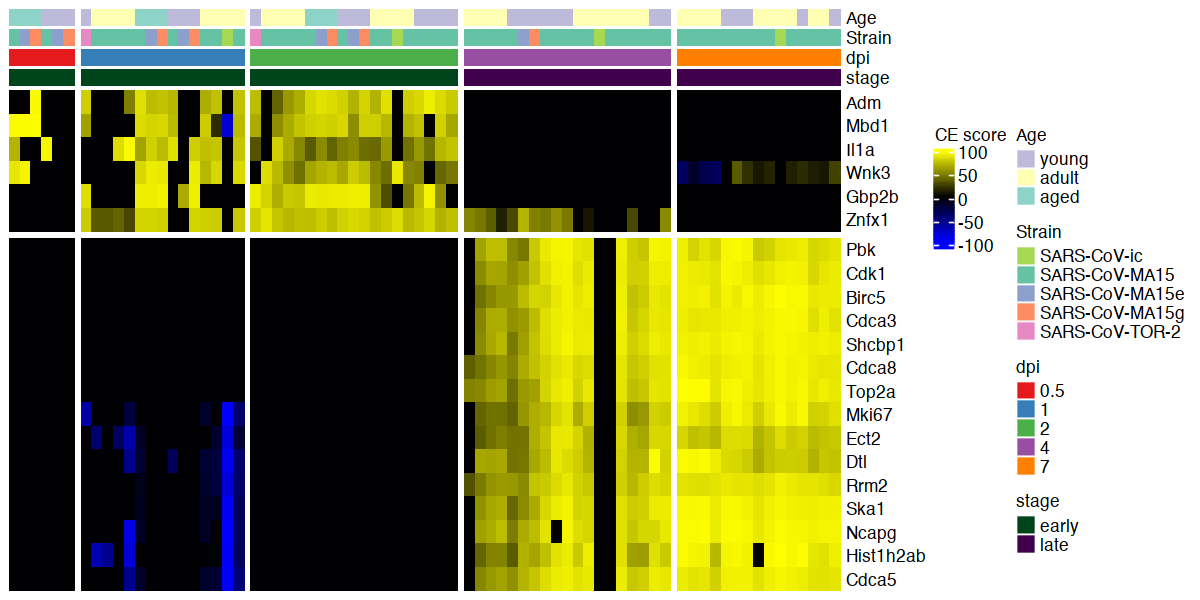

In [86]:
options(repr.plot.width = 10, repr.plot.height = 5)
n = 0
anno_colors <- list(stage = c(early = brewer.pal(n = 11, "PRGn")[11 - n], late = brewer.pal(n = 11, 
    "PRGn")[1 + n]), dpi = c(`0.5` = brewer.pal(n = 9, "Set1")[1], `1` = brewer.pal(n = 9, 
    "Set1")[2], `2` = brewer.pal(n = 9, "Set1")[3], `4` = brewer.pal(n = 9, "Set1")[4], 
    `7` = brewer.pal(n = 9, "Set1")[5]), Strain = c(`SARS-CoV-MA15` = brewer.pal(n = 8, 
    "Set2")[1], `SARS-CoV-MA15g` = brewer.pal(n = 8, "Set2")[2], `SARS-CoV-MA15e` = brewer.pal(n = 8, 
    "Set2")[3], `SARS-CoV-TOR-2` = brewer.pal(n = 8, "Set2")[4], `SARS-CoV-ic` = brewer.pal(n = 8, 
    "Set2")[5]), Age = c(aged = brewer.pal(n = 12, "Set3")[1], adult = brewer.pal(n = 12, 
    "Set3")[2], young = brewer.pal(n = 12, "Set3")[3]))

pal_atac <- colorRampPalette(c("#3361A5", "#248AF3", "#14B3FF", "#88CEEF", "#C1D5DC", 
    "#EAD397", "#FDB31A", "#E42A2A", "#A31D1D"))(100)
pal_atac <- colorRampPalette(c("blue", "black", "yellow"))(100)

col.gap = dat %>% colnames %>% sapply(., function(x) (strsplit(x, split = "_") %>% 
    unlist)[1]) %>% table %>% cumsum

df_col_anno = data.frame(col_name = dat %>% colnames) %>% separate(col_name, c("time", 
    "s"), remove = F, sep = "_") %>% mutate(stage = ifelse(time %in% c("0.5", "1", 
    "2"), "early", "late")) %>% select(-s) %>% column_to_rownames("col_name")
df_col_anno <- df_col_anno %>% rownames_to_column("Time_BiosetID") %>% left_join(meta.dat) %>% 
    column_to_rownames("Time_BiosetID") %>% select(-time) %>% select(stage, dpi, 
    Strain, Age)


pheatmap(dat[glist %>% rownames %>% rev, ], annotation_col = df_col_anno, name = "CE score", 
    annotation_colors = anno_colors, show_colnames = F, border_color = NA, gaps_col = col.gap, 
    scale = "none", color = pal_atac, cluster_rows = F, cluster_cols = F, show_rownames = T, 
    gaps_row = which((glist$avg_weight %>% rev) > 0)[1] - 1)

In [31]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /Users/fcheng/opt/miniconda3/envs/rnaApp/lib/libopenblasp-r0.3.15.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12    RColorBrewer_1.1-2 data.table_1.14.0  forcats_0.5.1     
 [5] stringr_1.4.0      dplyr_1.0.7        purrr_0.3.4        readr_1.4.0       
 [9] tidyr_1.1.3        tibble_3.1.2       ggplot2_3.3.5      tidyverse_1.3.1   
[13] jsonlite_1.7.2     formatR_1.11      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5      tidyselect_1.1.1  repr_1.1.3        haven_2.4.1      
 [5] colorspace_2.0-2  vctrs_0.3.8       generics_0.1.0    htmltools_0.5.1.1
 [9] base64enc_0.1-3   utf8_1.2.1        rlang_0.4.11      pillar_1.6.1     
[13] glue_1.4.2 